### Machine Failure Prediction

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
s = df.isna().sum()
s

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
df.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

### Seperate X and Y

In [6]:
X = df.drop(columns=['id','Product ID','Machine failure'])
Y = df[['Machine failure']]

In [7]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [8]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


### Seperate Cat and con features

In [9]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [10]:
cat

['Type']

In [11]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

### Create Sklearn pipeline for feature selection

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [13]:
# Numeric pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Categorical Pipeline
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant', fill_value='unknown')),
                           ('ordinal',OrdinalEncoder())])

# Combine cat and con pipelines
pre1 = ColumnTransformer([('num',num_pipe, con),
                          ('cat',cat_pipe, cat)])

In [14]:
X_pre = pre1.fit_transform(X)
X_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [15]:
cols = pre1.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [16]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

### Calculating Mutual Information Scores

In [18]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.00535768, 0.00176509, 0.01917274, 0.01982046, 0.0063401 ,
       0.00797967, 0.02424492, 0.0116656 , 0.01939567, 0.00171841,
       0.01168528])

In [19]:
mi = pd.Series(mi)
mi.index = cols
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.024245
num__Torque [Nm]                0.019820
num__OSF                        0.019396
num__Rotational speed [rpm]     0.019173
cat__Type                       0.011685
num__PWF                        0.011666
num__TWF                        0.007980
num__Tool wear [min]            0.006340
num__Air temperature [K]        0.005358
num__Process temperature [K]    0.001765
num__RNF                        0.001718
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

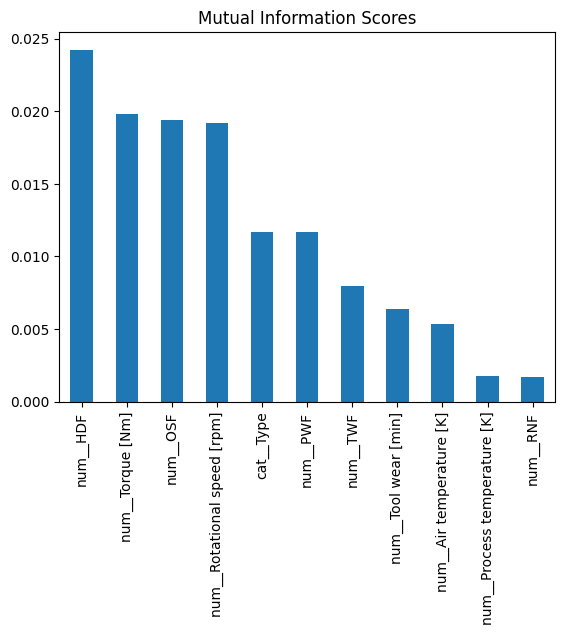

In [20]:
mi.plot(kind='bar',title='Mutual Information Scores')

In [21]:
sel_cols = list(mi[0:6].index)
sel_cols

['num__HDF',
 'num__Torque [Nm]',
 'num__OSF',
 'num__Rotational speed [rpm]',
 'cat__Type',
 'num__PWF']

In [22]:
# Select top n features
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(mutual_info_classif,k=6)
sel_features = sel.fit_transform(X_pre, Y)

In [23]:
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__HDF',
       'num__PWF', 'num__OSF', 'cat__Type'], dtype=object)

In [24]:
sel_cols[0].split('__')[1]

'Rotational speed [rpm]'

In [25]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [26]:
imp_cols

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'PWF', 'OSF', 'Type']

In [27]:
X_sel = X[imp_cols]

In [28]:
X_sel

,Rotational speed [rpm],Torque [Nm],HDF,PWF,OSF,Type
0,1596,36.1,0,0,0,L
1,1759,29.1,0,0,0,M
2,1805,26.5,0,0,0,L
3,1524,44.3,0,0,0,L
4,1641,35.4,0,0,0,M
...,...,...,...,...,...,...
136424,1530,37.5,0,0,0,M
136425,1447,49.1,0,0,0,H
136426,1524,38.5,0,0,0,L
136427,1447,46.3,0,0,0,L


In [29]:
## Cat , con for Selected features
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [30]:
cat_sel

['Type']

In [31]:
con_sel

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'PWF', 'OSF']

### Create a final Pipeline

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num',num_pipe2, con_sel),
                          ('cat',cat_pipe2, cat_sel)])

In [34]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre

array([[ 0.54541592, -0.49971115, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.72030819, -1.32302768, -0.07202055, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.05187289, -1.62883096, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.0264451 , -0.2174312 , -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [-0.52856537,  0.69997864, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.26430672, -0.12333789, -0.07202055, ...,  0.        ,
         1.        ,  0.        ]])

In [35]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__HDF',
       'num__PWF', 'num__OSF', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [36]:
X_sel_pre = pd.DataFrame(X_sel_pre, columns=final_cols)
X_sel_pre.head()

,num__Rotational speed [rpm],num__Torque [Nm],num__HDF,num__PWF,num__OSF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.545416,-0.499711,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
1,1.720308,-1.323028,-0.072021,-0.049016,-0.063038,0.0,0.0,1.0
2,2.051873,-1.628831,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
3,0.026445,0.464745,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
4,0.869773,-0.582043,-0.072021,-0.049016,-0.063038,0.0,0.0,1.0


### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

In [38]:

xtrain.shape

(109143, 8)

In [39]:
xtest.shape

(27286, 8)

### Algorithm Evaluation

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [41]:
dct = {'LogisticRegression':LogisticRegression(),
       'DecisionTree':DecisionTreeClassifier(),
       'RandomForest':RandomForestClassifier(),
       'GradientBoosting':GradientBoostingClassifier(),
       'SVM':SVC()}

In [42]:
dct.items()

dict_items([('LogisticRegression', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('GradientBoosting', GradientBoostingClassifier()), ('SVM', SVC())])

In [43]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model on training data
    model.fit(xtrain, ytrain)

    # Predict train and test results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)

    # Calculate F1 scores Training
    f1_tr = f1_score(ytrain, ypred_tr)

    # Calculate F1 Cross validated results
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    f1_tr_cv = scores.mean()

    # Calculate F1 score in testing
    f1_ts = f1_score(ytest, ypred_ts)

    # Append all values in list
    tr.append(f1_tr)
    tr_cv.append(f1_tr_cv)
    ts.append(f1_ts)

    # Print the results
    print(f'Model Name : {name}\n')
    print(f'F1 Training : {f1_tr:.4f}')
    print(f'F1 Training CV : {f1_tr_cv:.4f}')
    print(f'F1 Testing : {f1_ts:.4f}')
    print('\n===========================================\n')

Model Name : LogisticRegression

F1 Training : 0.8068
F1 Training CV : 0.8066
F1 Testing : 0.7951


Model Name : DecisionTree

F1 Training : 0.9136
F1 Training CV : 0.7154
F1 Testing : 0.7115


Model Name : RandomForest

F1 Training : 0.9144
F1 Training CV : 0.7692
F1 Testing : 0.7682


Model Name : GradientBoosting

F1 Training : 0.8173
F1 Training CV : 0.8070
F1 Testing : 0.7918


Model Name : SVM

F1 Training : 0.8072
F1 Training CV : 0.8066
F1 Testing : 0.7951




### Create a dataframe for model evaluation

In [44]:
dct_eval = {'Name':list(dct.keys()),
            'TrainF1':tr,
            'TrainF1CV':tr_cv,
            'TestF1':ts}

In [45]:
df_eval = pd.DataFrame(dct_eval)
df_eval

,Name,TrainF1,TrainF1CV,TestF1
0,LogisticRegression,0.806798,0.806561,0.795082
1,DecisionTree,0.913635,0.715422,0.711538
2,RandomForest,0.914447,0.769155,0.768229
3,GradientBoosting,0.817308,0.806987,0.791837
4,SVM,0.807212,0.806561,0.795082


In [46]:
df_eval.sort_values(by='TestF1',ascending=False)

,Name,TrainF1,TrainF1CV,TestF1
0,LogisticRegression,0.806798,0.806561,0.795082
4,SVM,0.807212,0.806561,0.795082
3,GradientBoosting,0.817308,0.806987,0.791837
2,RandomForest,0.914447,0.769155,0.768229
1,DecisionTree,0.913635,0.715422,0.711538


### Select the logistic regression model

Perform hyperparameter tuning on top model

In [47]:
params = {'C':[0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]}

In [48]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
rscv = RandomizedSearchCV(lr, param_distributions=params, cv=5, scoring='f1', random_state=21)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100,
                                              1000]},
                   random_state=21, scoring='f1')

In [49]:
rscv.best_params_

{'C': 0.001}

In [50]:
rscv.best_score_

0.8065609685913342

In [51]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=0.001)

### Evaluate best model

In [52]:
best_lr.score(xtrain, ytrain)

0.9948966035384771

In [53]:
best_lr.score(xtest, ytest)

0.9945026753646559

### Predict train and test data

In [54]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [55]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [56]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [57]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

### Create a confusion Matrix

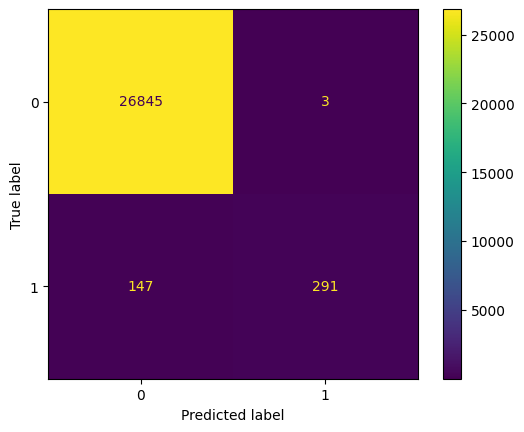

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_lr.classes_)
cfd.plot()

### Print classification Report on test data

In [59]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     26848
           1       0.99      0.66      0.80       438

    accuracy                           0.99     27286
   macro avg       0.99      0.83      0.90     27286
weighted avg       0.99      0.99      0.99     27286



### Calculating ROC - AUC Score

In [60]:
yprob_tr = best_lr.predict_proba(xtrain)[:,1]
yprob_ts = best_lr.predict_proba(xtest)[:,1]

In [61]:
yprob_tr[0:5]

array([0.00633199, 0.0062653 , 0.00891817, 0.00450279, 0.00466287])

In [62]:
yprob_ts[0:5]

array([0.93119503, 0.0050763 , 0.00544593, 0.00544696, 0.0054597 ])

In [63]:
## Check roc_auc score in training
from sklearn.metrics import roc_auc_score
roc_auc_score(ytrain, yprob_tr)

0.8880922139260139

In [64]:
## Check roc auc score in testing
roc_auc_score(ytest, yprob_ts)

0.9004468246063753

### Plot the ROC AUC Score

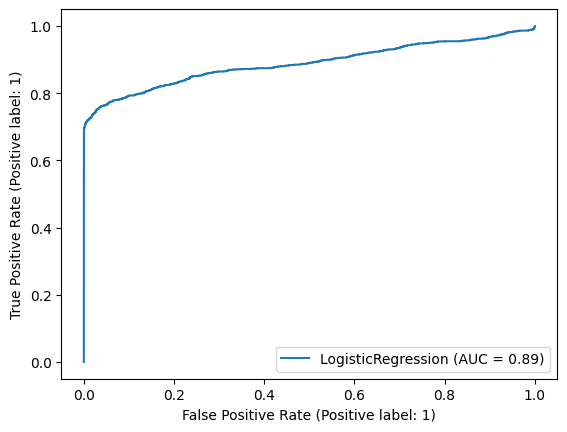

In [65]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr,xtrain, ytrain)

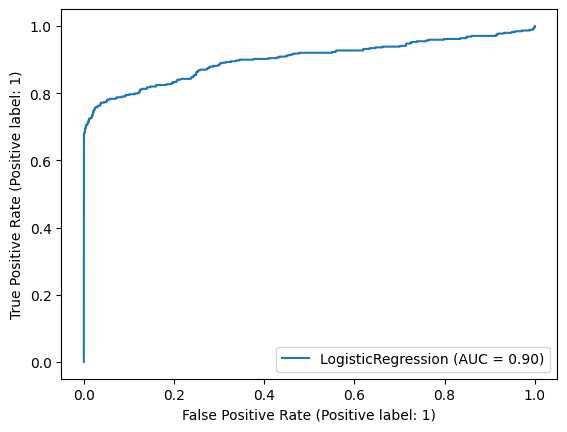

In [66]:
RocCurveDisplay.from_estimator(best_lr, xtest, ytest)

### Predict the test.csv

In [67]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [68]:
df.isnull()
df.isnull().sum().sum()
df.dropna(inplace=True)

In [69]:
xnew_pre = pre2.transform(xnew)
xnew_pre

array([[-0.15375311, -0.27623953, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.3887435 , -1.35831267, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.03365302, -0.31152452, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.13933725,  0.12365707, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.09852438, -0.00572124, -0.07202055, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.09852438, -0.49971115, -0.07202055, ...,  0.        ,
         1.        ,  0.        ]])

In [70]:
xnew_pre = pd.DataFrame(xnew_pre, columns=final_cols)
xnew_pre.head()

,num__Rotational speed [rpm],num__Torque [Nm],num__HDF,num__PWF,num__OSF,cat__Type_H,cat__Type_L,cat__Type_M
0,-0.153753,-0.276240,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
1,1.388744,-1.358313,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
2,0.033653,-0.311525,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
3,-0.297912,0.852880,-0.072021,-0.049016,-0.063038,0.0,0.0,1.0
4,-0.038426,0.111895,-0.072021,-0.049016,-0.063038,0.0,0.0,1.0


### Predict values

In [71]:
preds = best_lr.predict(xnew_pre)
probs = best_lr.predict_proba(xnew_pre)[:,1]

In [72]:
preds[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [73]:
probs[0:5]

array([0.00536694, 0.00415684, 0.00532883, 0.00682952, 0.00569497])

### Creating results in new dataframe

In [74]:
df_res = xnew[['id']]
df_res

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [75]:
df_res['Machine failure']=preds
df_res['Probability']=probs

In [76]:
df_res

,id,Machine failure,Probability
0,136429,0,0.005367
1,136430,0,0.004157
2,136431,0,0.005329
3,136432,0,0.006830
4,136433,0,0.005695
...,...,...,...
90949,227378,0,0.005751
90950,227379,0,0.004760
90951,227380,0,0.005928
90952,227381,0,0.005753


<Axes: xlabel='Machine failure'>

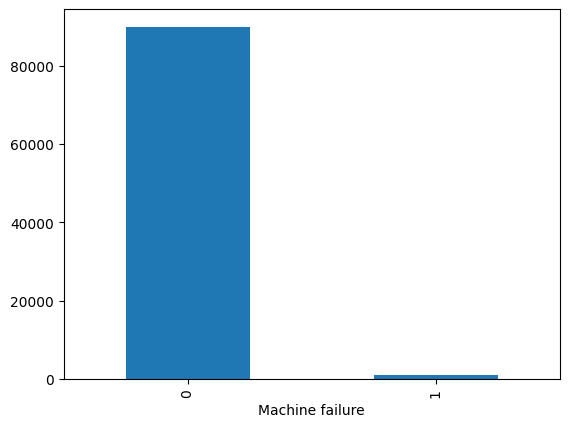

In [77]:
df_res['Machine failure'].value_counts().plot(kind='bar')

In [78]:
df_res.to_csv('predictions.csv',index=False)